In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

from matplotlib.colors import ListedColormap
import matplotlib

In [2]:
dataset = pd.read_csv("https://pycourse.s3.amazonaws.com/Social_Network_Ads.csv")
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#Extraindo as matrizes X e y
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:, 4].values

In [6]:
#Divindo em treino e teste
#Stratify Mantem a propoção dado determinado atributo passado por referência
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

In [12]:
#Escalando variáveis
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float64))
X_test = sc.transform(X_test.astype(np.float64))

In [13]:
#Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
#Predição no dataset de teste
y_pred = log_reg.predict(X_test)

In [15]:
# visualização da superfície de decisão
def plot_decision_boundary(X_set,
                           y_set,
                           classifier,
                           xlabel='',
                           ylabel='',
                           title=''):
  # visualizando a superfície de separação da predição
  plt.figure(figsize=(8,8))
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
  plt.contourf(X1, X2,
               classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.2, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.plot(X_set[y_set == j, 0], X_set[y_set == j, 1],'o',
                  c=ListedColormap(('red', 'green'))(i),label=j)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

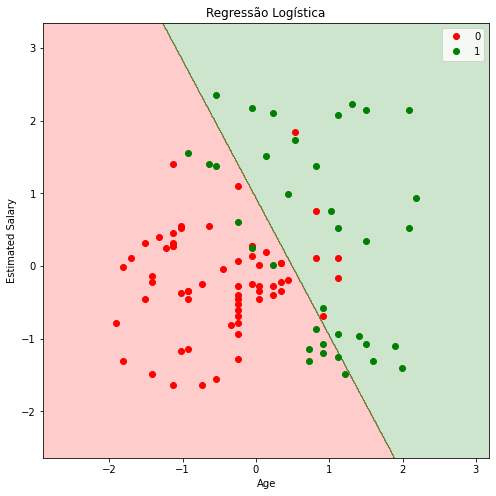

In [16]:
#Visualizando
plot_decision_boundary(X_set=X_test, y_set=y_test, classifier=log_reg, xlabel="Age", ylabel="Estimated Salary", title="Regressão Logística")

In [17]:
#KNN
n = 10
knn_reg = KNeighborsClassifier(n_neighbors=n)
knn_reg.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
y_pred = knn_reg.predict(X_test)

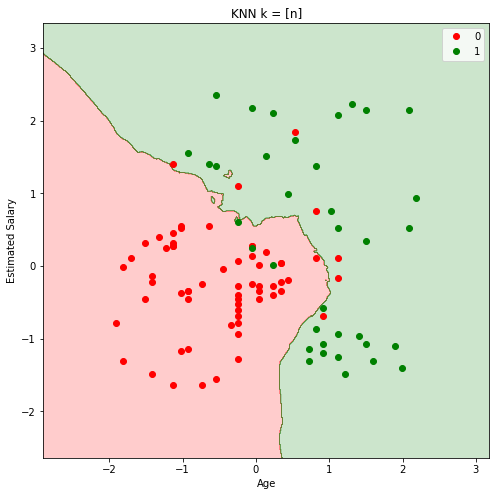

In [20]:
plot_decision_boundary(X_set=X_test, y_set=y_test, classifier=knn_reg, xlabel="Age", ylabel="Estimated Salary", title="KNN k = [n]")